# GT CRM 24/01/2021

## Medidas de Dispersão e Tendência Central

# Aplicação
As medidas de tendência central (como média, mediana e moda) e medidas de dispersão (como variância, desvio padrão e amplitude) são amplamente usadas em diversos contextos do dia a dia. Aqui estão alguns exemplos práticos:

**Educação:**

* **Média de Notas:** Professores calculam a média de notas de provas e trabalhos para determinar a performance geral de um aluno.

* **Desvio Padrão em Resultados de Testes:** Escolas e instituições de ensino frequentemente usam o desvio padrão para avaliar a dispersão das notas de alunos em uma prova, ajudando a entender quão uniformemente os alunos performaram.

**Saúde e Medicina:**

* **Mediana da Pressão Arterial ou Níveis de Colesterol:** Médicos frequentemente se referem à mediana ou à média de leituras de pressão arterial ou níveis de colesterol para avaliar a saúde de um paciente.
Variância em Pesquisas Clínicas: Em estudos clínicos, a variância e o desvio padrão são usados para entender a dispersão dos resultados, como a eficácia de um medicamento.

**Negócios e Finanças:**

* **Média de Vendas:** Empresas calculam a média de vendas diárias, mensais ou anuais para entender o desempenho do negócio.
Desvio Padrão em Investimentos: Investidores usam o desvio padrão para medir a volatilidade de retornos de um ativo, ajudando a entender o risco associado.

**Esportes:**

* **Média de Pontos por Jogo:** A média de pontos marcados por um jogador ou equipe pode ser usada para avaliar o desempenho.

* **Desvio Padrão em Resultados de Corridas:** O desvio padrão dos tempos de corrida pode ajudar a entender a consistência de um corredor.

**Meteorologia:**

* **Média de Temperaturas:** A média de temperaturas diárias, mensais ou anuais é usada para monitorar e prever o clima.

* **Amplitude Térmica:** A amplitude térmica diária (diferença entre a temperatura máxima e mínima) pode ser usada para entender as variações climáticas em uma região.

**Pesquisa de Mercado:**

* **Mediana de Renda dos Consumidores:** A mediana da renda em uma pesquisa de mercado pode ser mais informativa do que a média, especialmente se a distribuição de renda for assimétrica.

* **Desvio Padrão em Avaliações de Clientes:** O desvio padrão das avaliações de clientes sobre um produto pode indicar a consistência da satisfação do cliente.

Estes exemplos mostram como as medidas de tendência central e dispersão são ferramentas fundamentais para analisar e interpretar dados em vários aspectos da vida cotidiana.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import numpy as np

In [1]:
# roda códigos em R
%load_ext rpy2.ipython

# Criando os dados de exemplo

In [ ]:
# Python
aluno_nota = {
    'Ana': 3,
    'Breno': 4,
    'Carlos': 2,
    'Daniela': 11,
    'Zequinha': 3,
    'Fabiana': 7
}

df = pd.DataFrame(list(aluno_nota.items()), columns=['Aluno', 'Nota'])

print(df)

      Aluno  Nota
0       Ana     3
1     Breno     4
2    Carlos     2
3   Daniela    11
4  Zequinha     3
5   Fabiana     7


In [2]:
%%R

# Dados de alunos e notas
aluno_nota <- list(
  Ana = 3,
  Breno = 4,
  Carlos = 2,
  Daniela = 11,
  Zequinha = 3,
  Fabiana = 7
)

# Convertendo para data frame
df <- data.frame(Aluno = names(aluno_nota), Nota = unlist(aluno_nota), stringsAsFactors = FALSE)

# Exibindo o data frame
print(df)


            Aluno Nota
Ana           Ana    3
Breno       Breno    4
Carlos     Carlos    2
Daniela   Daniela   11
Zequinha Zequinha    3
Fabiana   Fabiana    7


# Medidas de Tendência Central

* As medidas de tendência central são valores que representam o ponto central ou típico de um conjunto de dados. As três principais medidas de tendência central são: Média, Mediana e Moda

## Moda

Em um conjunto de dados, a moda é o valor mais frequente no conjunto, ou seja, que mais se repete.

In [ ]:
# Para calcular a moda basta ordenar os dados e analisar o que mais se repete
df['Nota'].value_counts()

3     2
4     1
2     1
11    1
7     1
Name: Nota, dtype: int64

In [ ]:
# ou usar a função mode da biblioteca scipy
moda = st.mode(df['Nota'])
print(moda)

3


Moda em uma query SQL
```
SELECT modalidade_conta, COUNT(*) AS total_contas
FROM conta
GROUP BY modalidade_conta
ORDER BY total_contas DESC
LIMIT 1
```

Moda em R

In [3]:
%%R
moda_values <- table(df$Nota)
moda <- names(moda_values)[which.max(moda_values)]
print(paste("Moda: ", moda))

[1] "Moda:  3"


## Média

A média é o valor obtido pela soma de todos os valores do conjunto, dividida pelo número de valores.

$$ \mu = \frac{1}{N}\sum_{i=1}^{N}x_i $$

In [ ]:
soma_conjunto = df['Nota'].sum()
total_valores = len(df['Nota'])
media = soma_conjunto/total_valores

# Calculando a média com uma função built-in
media_python = df['Nota'].mean()

print(f'Valor da média calculado na "mão": {media}, média calculada usando a função mean: {media_python}')

Valor da média calculado na "mão": 5.0, média calculada usando a função mean: 5.0


A média é útil para obter uma ideia geral do desempenho da turma, mas pode ser influenciada por valores muito altos ou muito baixos (outliers). Por exemplo, uma única nota muito alta (como a nota 11 de Daniela) pode elevar a média, não refletindo precisamente o desempenho típico dos alunos.

Média em uma consulta SQL

```
SELECT AVG(valor_boleto)
FROM pagamentos;
```

Média em R

In [4]:
%%R
media <- mean(df$Nota)
print(paste("Valor da média calculado em R:", media))

[1] "Valor da média calculado em R: 5"


## Mediana

A mediana é o valor que separa a metade superior da metade inferior de um conjunto de dados. Para encontrá-la, você organiza os valores em ordem crescente e seleciona o valor do meio. Se o número de observações for par, a mediana é a média dos dois valores centrais. A mediana é menos sensível a outliers em comparação com a média e, muitas vezes, é considerada uma representação mais precisa da tendência central, especialmente em distribuições assimétricas.

No nosso exemplo, a mediana dá uma ideia melhor do desempenho típico dos alunos, pois não é tão influenciada pela nota atipicamente alta da Daniela.








In [ ]:
# Ordenando os valores
notas_ordenadas = df['Nota'].sort_values()

# Contando o número total de valores
total_valores = len(notas_ordenadas)

# Calculando a mediana
if total_valores % 2 == 0:
    # Se o número de valores é par, a mediana é a média dos dois valores do meio
    valor_meio1 = notas_ordenadas.iloc[(total_valores//2) - 1]
    valor_meio2 = notas_ordenadas.iloc[total_valores//2]
    mediana = (valor_meio1 + valor_meio2) / 2
else:
    # Se o número de valores é ímpar, a mediana é o valor do meio
    mediana = notas_ordenadas.iloc[total_valores//2]

# Calculando a mediana com uma função built-in
mediana_python = df['Nota'].median()

print(f'Valor da mediana calculado na "mão": {mediana}, mediana calculada usando a função median: {mediana_python}')

Valor da mediana calculado na "mão": 3.5, mediana calculada usando a função median: 3.5


Mediana em uma consulta SQL

```
SELECT PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY sale) FROM sales;
```

Mediana em R

In [6]:
%%R
# Ordenando os valores em R
notas_ordenadas <- sort(df$Nota)

# Calculando o número total de valores
total_valores <- length(notas_ordenadas)

# Calculando a mediana em R
if (total_valores %% 2 == 0) {
  # Se o número de valores é par, a mediana é a média dos dois valores do meio
  valor_meio1 <- notas_ordenadas[total_valores %/% 2]
  valor_meio2 <- notas_ordenadas[(total_valores %/% 2) + 1]
  mediana <- (valor_meio1 + valor_meio2) / 2
} else {
  # Se o número de valores é ímpar, a mediana é o valor do meio
  mediana <- notas_ordenadas[(total_valores + 1) %/% 2]
}

# Exibindo o valor da mediana calculado em R
print(paste("Valor da mediana calculado em R:", mediana))

# Calculando a mediana usando a função median() em R
mediana_r <- median(df$Nota)

# Exibindo a mediana calculada em R
print(paste("Mediana calculada usando a função median em R:", mediana_r))


[1] "Valor da mediana calculado em R: 3.5"
[1] "Mediana calculada usando a função median em R: 3.5"


# Representação Gráfica

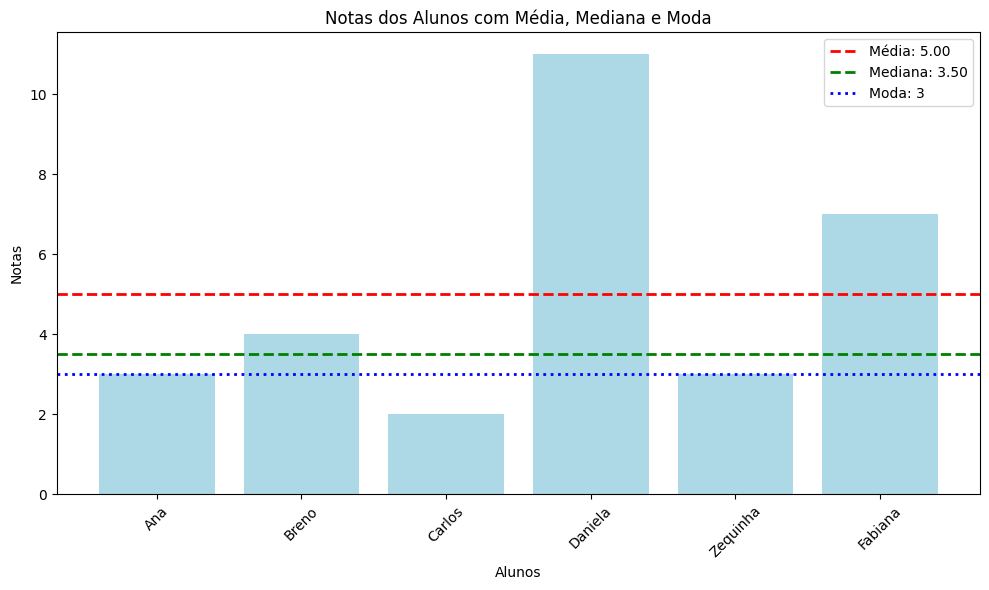

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df['Aluno'], df['Nota'], color='lightblue')

# Adicionando linhas para média, mediana e moda
plt.axhline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
plt.axhline(mediana, color='g', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axhline(moda, color='b', linestyle='dotted', linewidth=2, label=f'Moda: {moda}')

plt.title('Notas dos Alunos com Média, Mediana e Moda')
plt.xlabel('Alunos')
plt.ylabel('Notas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Medidas de Dispersão
* As medidas de dispersão indicam o grau em que os dados estão espalhados ou a variação dos dados em torno de uma medida central. As principais medidas de dispersão são: Desvio padrão, Amplitude(Range) e Quartis e Intervalo Interquartil (IQR)

## Amplitude

 É a diferença entre o maior e o menor valor no conjunto de dados. Indica a extensão da variação nos dados, mas é altamente sensível a outliers.

In [ ]:
amplitude = (df['Nota'].max()) - (df['Nota'].min())
amplitude

9

## Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica o quanto os valores de um conjunto de dados se desviam da média. Em outras palavras, ele indica o quanto os valores no conjunto de dados estão espalhados em relação à média.

### Como Interpretar o Desvio Padrão:
**Baixo Desvio Padrão:** Um desvio padrão baixo significa que os valores dos dados tendem a estar muito próximos da média. Em outras palavras, há pouca variação ou dispersão em relação à média.

**Alto Desvio Padrão:** Um desvio padrão alto indica que os valores dos dados estão espalhados em uma faixa mais ampla. Há uma maior variação em relação à média.

### Cálculo do Desvio Padrão:
O desvio padrão é calculado pela raiz quadrada da variância. A variância é a média dos quadrados das diferenças entre cada valor e a média do conjunto de dados.

$$ \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \mu)^2} $$

In [ ]:
# Calculando a variância
variancia = ((df['Nota'] - media) ** 2).sum() / (len(df['Nota']) - 1)

# Calculando o desvio padrão
desvio_padrao = variancia ** 0.5

desvio_padrao_python = df['Nota'].std()
print(f'Valor da desvio padrão calculado na "mão": {desvio_padrao}, desvio padrão calculado usando a função std: {desvio_padrao_python}')

Valor da desvio padrão calculado na "mão": 3.40587727318528, desvio padrão calculado usando a função std: 3.40587727318528


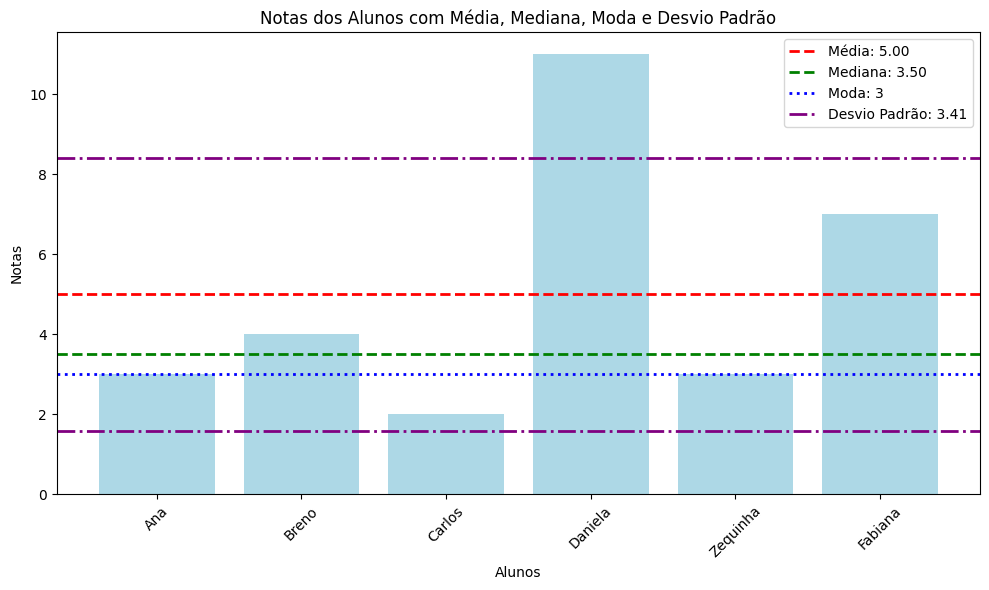

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Aluno'], df['Nota'], color='lightblue')

# Adicionando linhas para média, mediana e moda
plt.axhline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
plt.axhline(mediana, color='g', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.axhline(moda, color='b', linestyle='dotted', linewidth=2, label=f'Moda: {moda}')

# Adicionando linha para o desvio padrão
plt.axhline(media + desvio_padrao, color='purple', linestyle='dashdot', linewidth=2, label=f'Desvio Padrão: {desvio_padrao:.2f}')
plt.axhline(media - desvio_padrao, color='purple', linestyle='dashdot', linewidth=2)

plt.title('Notas dos Alunos com Média, Mediana, Moda e Desvio Padrão')
plt.xlabel('Alunos')
plt.ylabel('Notas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Quartis e Intervalo Interquartil (IQR):
* Os quartis dividem os dados ordenados em quatro partes iguais. O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) e descreve a variação no meio 50% dos dados.

## Boxplot

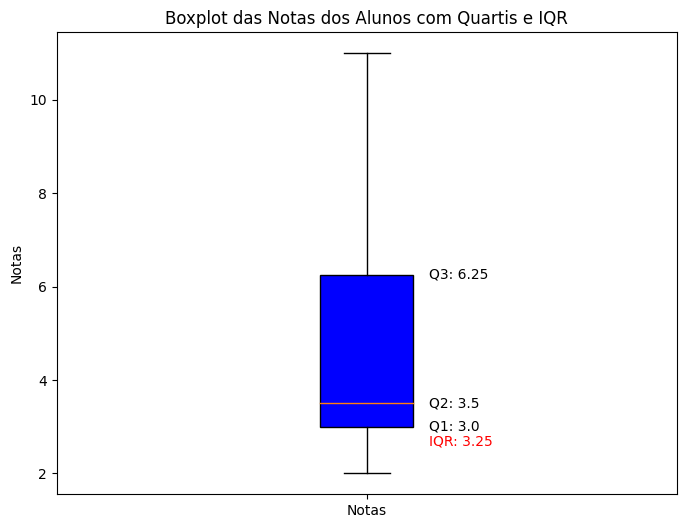

In [ ]:
# Calculando os quartis e IQR
Q1 = df['Nota'].quantile(0.25)
Q2 = df['Nota'].median()  # ou quantile(0.5)
Q3 = df['Nota'].quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(df['Nota'], patch_artist=True)

colors = ['#0000FF']
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[0])

# Adicionando anotações para os quartis
plt.text(1.1, Q1, f'Q1: {Q1}', verticalalignment='center', fontsize=10)
plt.text(1.1, Q2, f'Q2: {Q2}', verticalalignment='center', fontsize=10)
plt.text(1.1, Q3, f'Q3: {Q3}', verticalalignment='center', fontsize=10)
plt.text(1.1, Q1 - (0.1 * IQR), f'IQR: {IQR}', verticalalignment='center', fontsize=10, color='red')


plt.title('Boxplot das Notas dos Alunos com Quartis e IQR')
plt.xticks([1], ['Notas'])
plt.ylabel('Notas')


plt.show()